<a href="https://colab.research.google.com/github/holictoweb/python_finance_analysis/blob/master/backtrader/backtrader_basic_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install yfinance
!pip install backtrader

     |████████████████████████████████| 419kB 4.6MB/s 


##### SMA 기반의 전략 테스트

- SMA(3)= 3일 단순이동평균 ; 지난 3일동안의 단순 가격 평균

- EMA (Exponential Moving Average)
SMA에 단점을 보완해서 나온 것이 EMA이다.
SMA가 과거부터 지금까지 가격을 모두 더해 평균을 낸 것이라면, EMA는 변수를 이용해 최근 값에 영향력을 높이고 과거 값의 영향력을 낮춰 이동평균선의 호라발한 움직음을 보여준다.


In [7]:
from datetime import datetime
import backtrader as bt

In [15]:
# SMA 전략을 나타내는 클래스 정의
class SmaSignal (bt.Signal):
  params = (('period',20), )
  def __init__(self):
    self.lines.signal = self.data -bt.ind.SMA(period=self.p.period)

In [9]:
# 야후 파이낸스에서 애플 주가 데이터 로드
data = bt.feeds.YahooFinanceData(dataname = 'AAPL',
                                 fromdate = datetime(2020,1,1),
                                 todate=datetime(2021,3,1)
                                 )

#### backtrader 설정 



- cerebro.broker.setcash (default : 10,000원) 초기 자본금 설정
- cerebro.broker.setcommision (default : 0.0%) 매매 수수료 설정 
- cerebro.broker.addstrategy 매매 전략을 입력 
- cerebro.adddata() 데이터 추가 







In [16]:
# backtrader 설정 

cerebro = bt.Cerebro(stdstats = False)

# 데이터 추가
cerebro.adddata(data)
cerebro.broker.setcash(1000.0)
cerebro.add_signal(bt.SIGNAL_LONG, SmaSignal)
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)


In [18]:
# backtest 실행

print(f'Starting Portfolio Value: {cerebro.broker.getvalue():.2f}')
cerebro.run()
print(f'Final Portfolio Value: {cerebro.broker.getvalue():.2f}')

Starting Portfolio Value: 1000.00
Final Portfolio Value: 1032.22


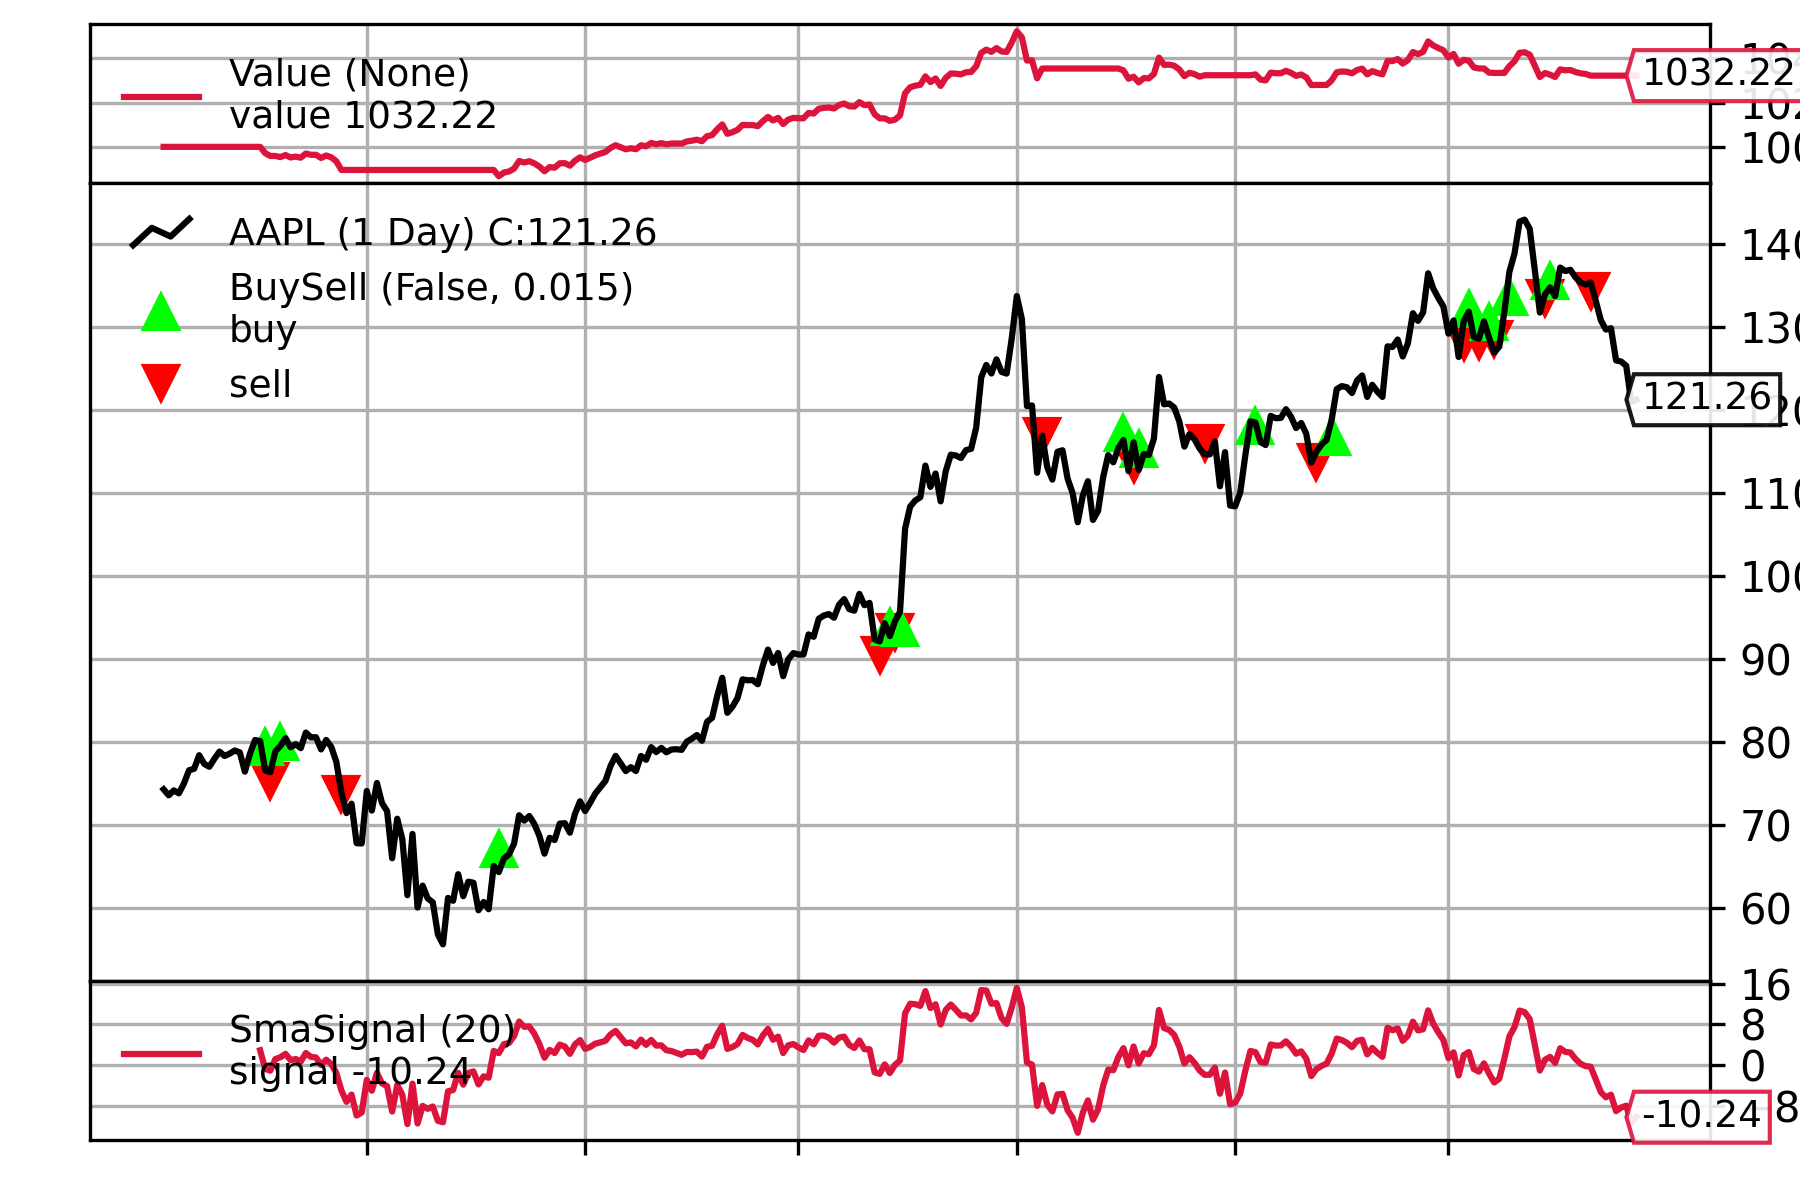

In [20]:

from google.colab import files
from IPython.display import Image
chart_file = 'result.png'
cerebro.plot()[0][0].savefig(chart_file, dpi=300)
Image(open(chart_file, 'rb').read())

#cerebro.plot(iplot=True, volume=False)